In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"zomato_dataset.csv")

In [5]:
df.head()

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [7]:
df.columns

Index(['Restaurant_Name', 'Dining_Rating', 'Delivery_Rating', 'Dining_Votes',
       'Delivery_Votes', 'Cuisine ', 'Place_Name', 'City', 'Item_Name',
       'Best_Seller', 'Votes', 'Prices'],
      dtype='object')

In [9]:
df.shape

(123657, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant_Name  123657 non-null  object 
 1   Dining_Rating    91421 non-null   float64
 2   Delivery_Rating  122377 non-null  float64
 3   Dining_Votes     123657 non-null  int64  
 4   Delivery_Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place_Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item_Name        123657 non-null  object 
 9   Best_Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [13]:
df.size

1483884

In [15]:
df.isnull().sum()

Restaurant_Name        0
Dining_Rating      32236
Delivery_Rating     1280
Dining_Votes           0
Delivery_Votes         0
Cuisine                0
Place_Name             0
City                   0
Item_Name              0
Best_Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [17]:
(df.isnull().sum() / len(df)) * 100 #% of null value

Restaurant_Name     0.000000
Dining_Rating      26.068884
Delivery_Rating     1.035121
Dining_Votes        0.000000
Delivery_Votes      0.000000
Cuisine             0.000000
Place_Name          0.000000
City                0.000000
Item_Name           0.000000
Best_Seller        77.403625
Votes               0.000000
Prices              0.000000
dtype: float64

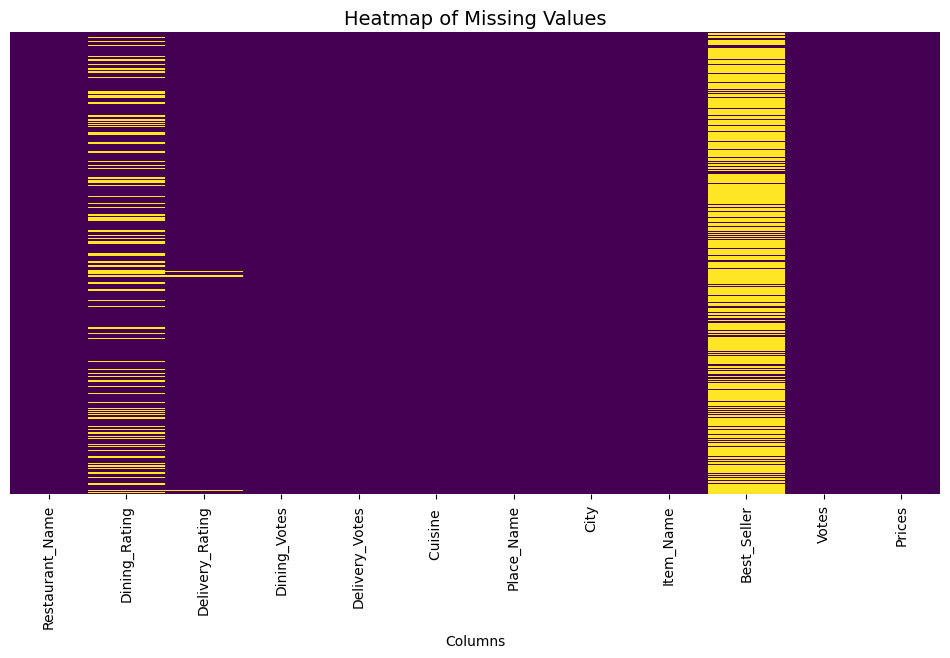

In [19]:
plt.figure(figsize=(12, 6))  
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values", fontsize=14)
plt.xlabel("Columns")
plt.show()

In [23]:
df["Dining_Rating"].fillna("Not provided", inplace=True)
df["Delivery_Rating"].fillna("Not provided", inplace=True)
df["Best_Seller"].fillna("NA", inplace=True)

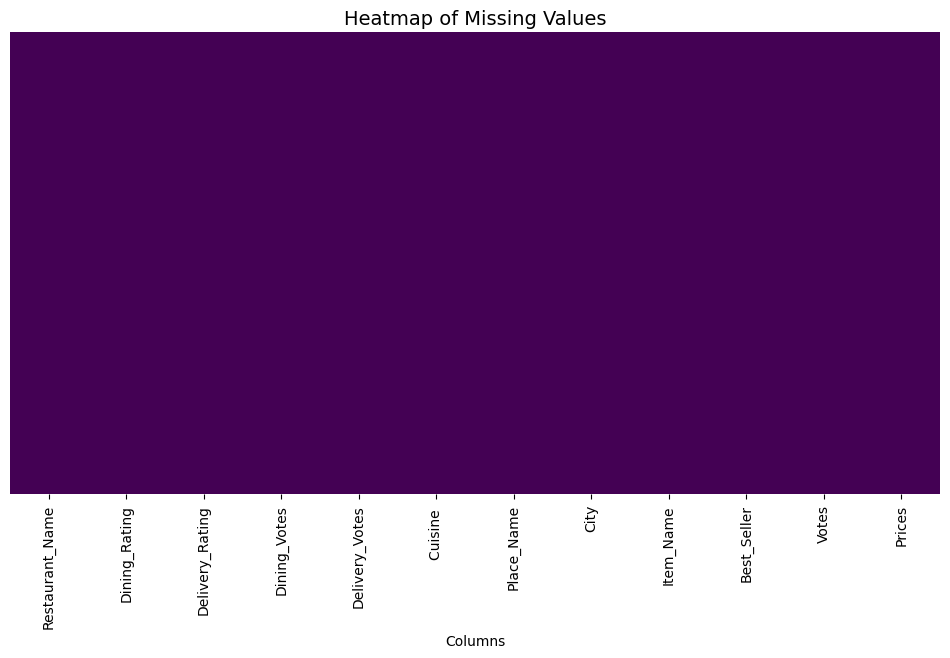

In [25]:
plt.figure(figsize=(12, 6))  
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values", fontsize=14)
plt.xlabel("Columns")
plt.show()  #ALL NULL VALUE ARE ADJUSTED

In [27]:
df["City"].value_counts()

City
Hyderabad       15613
Jaipur          14438
Mumbai          13535
Chennai         13100
Bangalore       12040
Ahmedabad       10178
Kolkata          8662
Pune             8067
Kochi            7759
Raipur           7700
Lucknow          6455
New Delhi        3490
Goa              2360
Banaswadi          97
Ulsoor             66
Magrath Road       54
Malleshwaram       43
Name: count, dtype: int64

In [29]:
# Step 1: Strip whitespace and make everything consistent (optional but safe)
df['City'] = df['City'].str.strip().str.title()

# Step 2: Replace specific localities with 'Bangalore' as Banaswadi ,Ulsoor, Magrath Road, Malleshwaram are locality
locality_to_bangalore = {
    'Banaswadi': 'Bangalore',
    'Ulsoor': 'Bangalore',
    'Magrath Road': 'Bangalore',
    'Malleshwaram': 'Bangalore'
}

df['City'] = df['City'].replace(locality_to_bangalore)

# Step 3: Double-check
print(df['City'].value_counts())

City
Hyderabad    15613
Jaipur       14438
Mumbai       13535
Chennai      13100
Bangalore    12300
Ahmedabad    10178
Kolkata       8662
Pune          8067
Kochi         7759
Raipur        7700
Lucknow       6455
New Delhi     3490
Goa           2360
Name: count, dtype: int64


In [31]:
df['total_votes'] = df['Dining_Votes'] + df['Delivery_Votes']

# Exploratory Data Analysis


##### This section focuses on uncovering meaningful patterns and trends through a variety of visualizations. The goal is to gain deeper insights into the key elements shaping restaurant performance and customer preferences, ultimately guiding a more informed understanding of the food service landscape.

### Number of Restaurants by Citites

In [41]:
res_count=df.groupby(['City'])['Restaurant_Name'].nunique().to_frame().reset_index().sort_values(by='Restaurant_Name', ascending=False).rename(columns={'Restaurant_Name':'Count'})


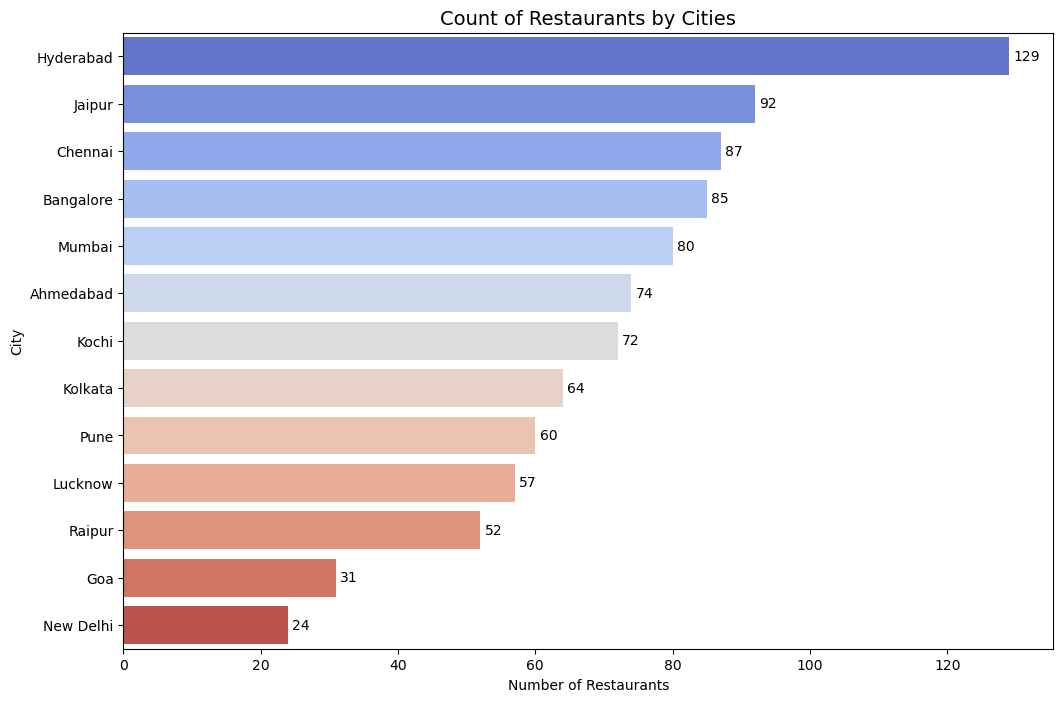

In [43]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Count',
    y='City',
    data=res_count,
    hue='City',
    palette='coolwarm',
)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10)

plt.title("Count of Restaurants by Cities", fontsize=14)
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

## Observation: Restaurant Listings by City

### The number of restaurants listed on Zomato in each city serves as an indicator of local demand for online food delivery services.

##### Hyderabad stands out with the highest number of listed restaurants (129), suggesting a strong customer base actively engaging with food delivery platforms. In contrast, cities with fewer listings may represent untapped potential. By expanding its restaurant partnerships and enhancing visibility in these regions, Zomato could significantly grow its presence and market share.



### Most popular Restaurant by city

In [63]:
# Step 1: Convert rating columns to numeric (handle string errors)
df['Dining_Rating'] = pd.to_numeric(df['Dining_Rating'], errors='coerce')
df['Delivery_Rating'] = pd.to_numeric(df['Delivery_Rating'], errors='coerce')

# Step 2: Create Total Rating
df['Total_rating'] = df['Dining_Rating'] + df['Delivery_Rating']

# Step 3: Group by City & Restaurant, get max total rating
df_rating = df.groupby(['City', 'Restaurant_Name'], as_index=False)['Total_rating'].max()

# Step 4: Find index of the top-rated restaurant in each city
idx = df_rating.groupby('City')['Total_rating'].idxmax()

# Step 5: Extract and format the result
df_rating_max = df_rating.loc[idx].set_index('City')

# Optional: Sort if needed
df_rating_max = df_rating_max.sort_values('Total_rating', ascending=False)

# Display result
df_rating_max


,Restaurant_Name,Total_rating
City,,
New Delhi,Natural Ice Cream,9.3
Mumbai,Chaitanya,8.9
Bangalore,Truffles,8.9
Hyderabad,Exotica,8.9
Chennai,Toscano,8.8
Jaipur,Thali and More,8.8
Kochi,Al Taza,8.8
Kolkata,Mitra Cafe,8.8
Ahmedabad,Urban Khichdi,8.7


### Top 5 restaurants in each city

13 cities


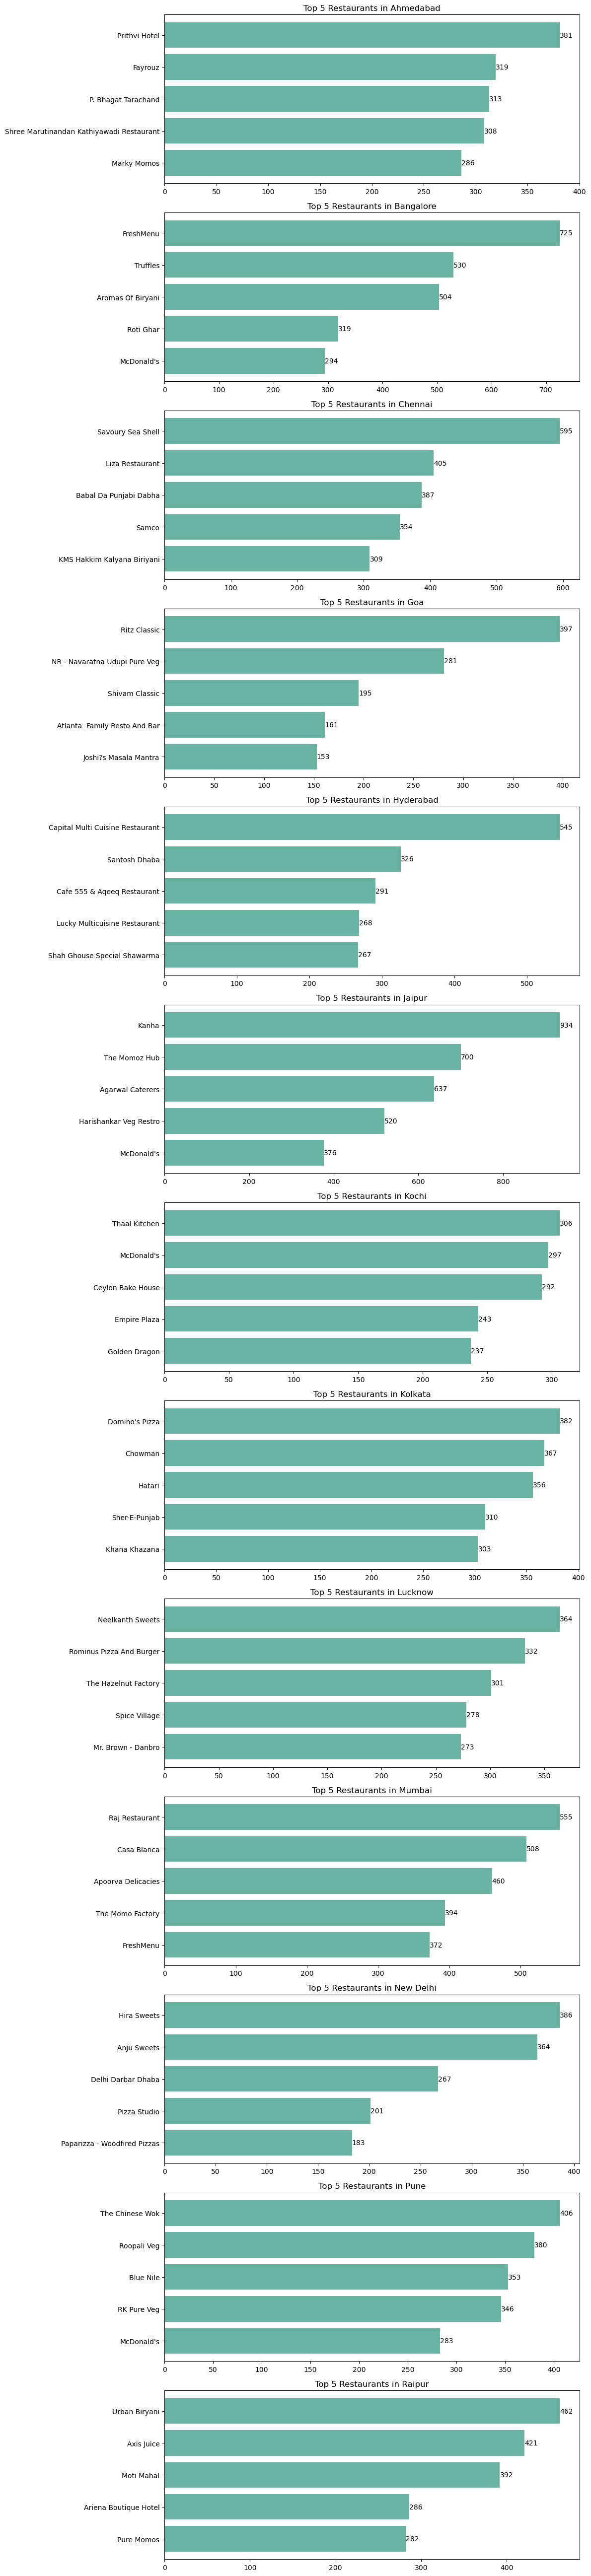

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Group and count restaurant occurrences per city
df_res_cnt = df.groupby(['City', 'Restaurant_Name']).size().reset_index(name='Count')

# Step 2: Function to plot top 5 restaurants per city
def get_restaurant(df, title):
    cities = df['City'].dropna().unique()
    num_cities = len(cities)
    print(f'{num_cities} cities')

    fig, axs = plt.subplots(num_cities, 1, figsize=(12, 4 * num_cities), facecolor="w", edgecolor="k")
    fig.subplots_adjust(hspace=0.6)
    axs = axs.ravel()

    for i, city in enumerate(cities):
        df_city = df[df["City"] == city].nlargest(5, 'Count')
        bars = axs[i].barh(df_city['Restaurant_Name'], df_city['Count'], color='#69b3a2')
        axs[i].set_title(f"{title} in {city}", fontsize=12)
        axs[i].invert_yaxis()
        axs[i].bar_label(bars, fontsize=10)

    plt.tight_layout()
    plt.show()

# Step 3: Call the function
get_restaurant(df_res_cnt, "Top 5 Restaurants")


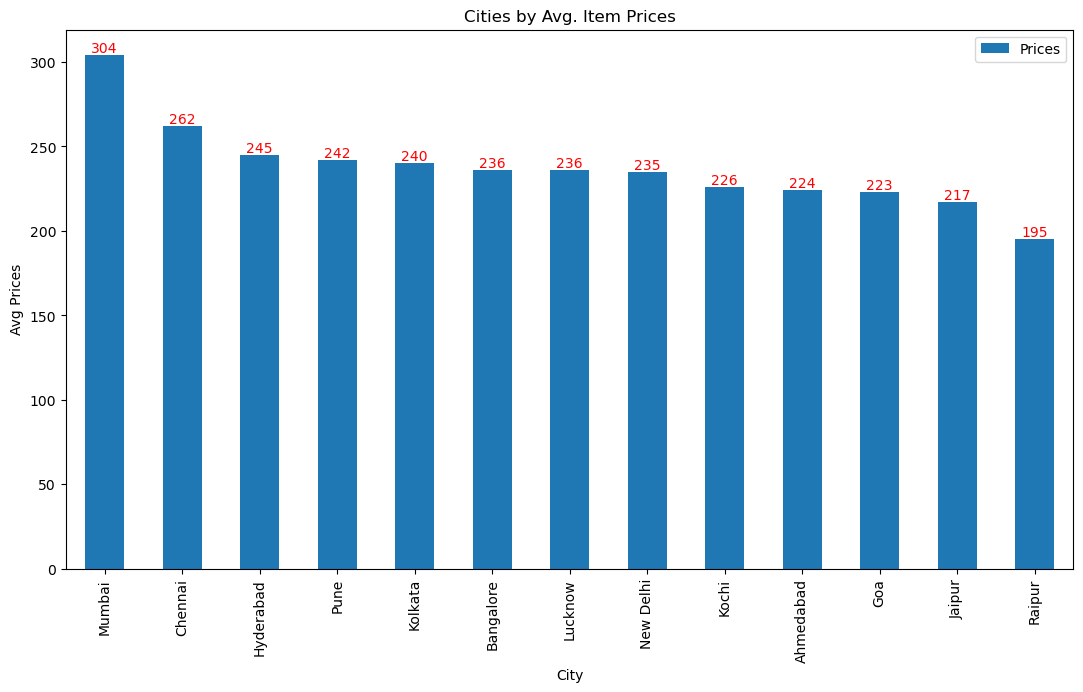

In [90]:
ax = df.groupby('City')['Prices'].mean().apply(lambda x: round(x, 0)).to_frame().reset_index().sort_values(by='Prices',
                                                                              ascending=False).plot.bar(x='City',y='Prices',figsize=(13,7))
ax.bar_label(container=ax.containers[0], color='Red')
plt.title("Cities by Avg. Item Prices")
plt.ylabel("Avg Prices")
plt.xlabel("City")
plt.show()

##### Mumbai stands out significantly with an average item price of 304. This might indicate that it's a more affluent area or that certain goods and services are priced higher there compared to other cities.
##### Raipur has average item prices in the lower to mid-200s range, indicating a generally moderate cost of living or pricing for goods and services.


### Cities have the highest average delivery rating


In [103]:
#zomato services in cities based on delivery rating
df.groupby('City')['Delivery_Rating'].mean().apply(lambda x: round(x,2)).to_frame().sort_values(by='Delivery_Rating', ascending=False)

,Delivery_Rating
City,
Pune,4.02
Hyderabad,4.00
Jaipur,4.00
Kolkata,3.98
Bangalore,3.97
Chennai,3.96
Lucknow,3.96
New Delhi,3.95
Mumbai,3.94


### Based on the delivery ratings provided for each city on Zomato, here are some insights into Zomato's services:



##### -Cities with higher delivery ratings, These high ratings suggest that Zomato is effectively meeting customer expectations in terms of delivery speed, accuracy, and overall service quality in these areas.
##### -Lower ratings may indicate areas where Zomato can focus on improving its delivery services, addressing issues such as delivery delays, order accuracy, and customer communication to enhance overall customer satisfaction

In [114]:
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

In [180]:
import pandas as pd
import folium

# Step 1: Create city-wise restaurant count data
city_counts = pd.DataFrame({
    'City': ['Hyderabad', 'Jaipur', 'Mumbai', 'Chennai', 'Bangalore', 'Ahmedabad', 'Kolkata',
             'Pune', 'Kochi', 'Raipur', 'Lucknow', 'New Delhi', 'Goa'],
    'Count': [15613, 14438, 13535, 13100, 12040, 10178, 8662, 8067, 7759, 7700, 6455, 3490, 2360]
})

# Step 2: Add latitude and longitude for each city
city_coords = {
    'Hyderabad': (17.385044, 78.486671),
    'Jaipur': (26.912434, 75.787270),
    'Mumbai': (19.076090, 72.877426),
    'Chennai': (13.082680, 80.270721),
    'Bangalore': (12.971599, 77.594566),
    'Ahmedabad': (23.022505, 72.571362),
    'Kolkata': (22.572645, 88.363892),
    'Pune': (18.520430, 73.856743),
    'Kochi': (9.931233, 76.267303),
    'Raipur': (21.251384, 81.629639),
    'Lucknow': (26.846695, 80.946167),
    'New Delhi': (28.613939, 77.209023),
    'Goa': (15.299326, 74.123993)
}

city_counts['Latitude'] = city_counts['City'].map(lambda x: city_coords[x][0])
city_counts['Longitude'] = city_counts['City'].map(lambda x: city_coords[x][1])

# Step 3: Create and display the map
map_india = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

for _, row in city_counts.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 1000,  # adjust for visibility
        popup=f"{row['City']}: {row['Count']} restaurants",
        color='blue',  # changed from crimson to purple
        fill=True,
        fill_color='cadetblue',
        fill_opacity=0.7
    ).add_to(map_india)

# Step 4: Save the map
map_india.save("zomato_city_map.html")
map_india

In [138]:
# Group by 'City' and count the number of restaurants
city_restaurant_count = df.groupby('City')['Restaurant_Name'].count().reset_index()

# Rename columns for clarity
city_restaurant_count.columns = ['City', 'Number_of_Restaurants']

# Sort by number of restaurants (optional)
city_restaurant_count = city_restaurant_count.sort_values(by='Number_of_Restaurants', ascending=False)
print(city_restaurant_count)

         City  Number_of_Restaurants
4   Hyderabad                  15613
5      Jaipur                  14438
9      Mumbai                  13535
2     Chennai                  13100
1   Bangalore                  12300
0   Ahmedabad                  10178
7     Kolkata                   8662
11       Pune                   8067
6       Kochi                   7759
12     Raipur                   7700
8     Lucknow                   6455
10  New Delhi                   3490
3         Goa                   2360


##### - **Hyderabad** has the highest number of restaurants (15,613), showing a strong food service presence.
##### - **Jaipur** (14,438) and **Mumbai** (13,535) follow closely behind.
##### - Other major cities like **Chennai**, **Bangalore**, and **Ahmedabad** also have a high concentration of restaurants.
##### - **Pune**, **Kolkata**, and **Kochi** show moderate numbers, indicating growing food service activity.
##### - **Raipur**, **Lucknow**, and **Goa** have fewer restaurants, suggesting smaller markets or developing food infrastructure.
##### - Overall, South and Western Indian cities dominate in restaurant count, showing higher demand and market saturation.

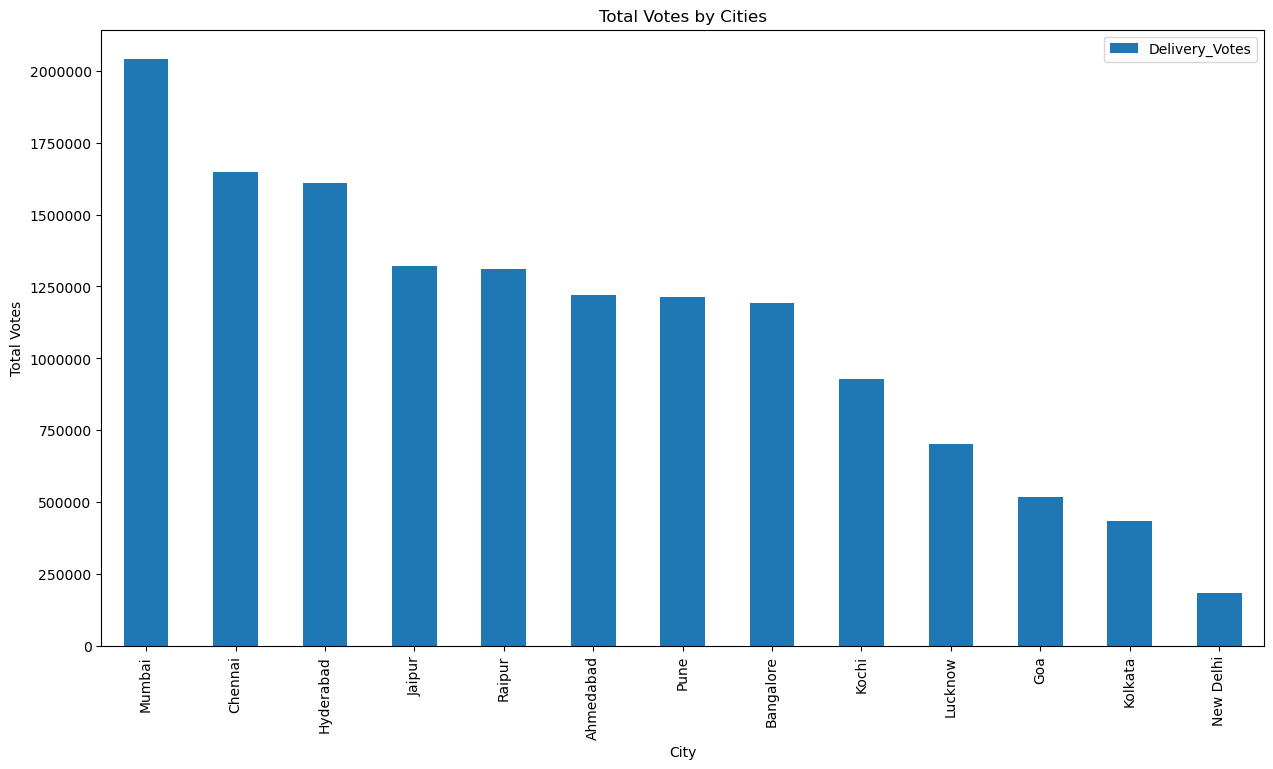

In [183]:
ax = df.groupby('City')['Delivery_Votes'].sum().sort_values(ascending=False).reset_index().plot.bar(x='City',y='Delivery_Votes',figsize=(15,8))
# ax.bar_label(container=ax.containers[0])
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.title("Total Votes by Cities")
plt.ylabel("Total Votes")
plt.xlabel("City")
plt.show()

##### Mumbai's ability to achieve high engagement despite having fewer restaurants, it indicates potential for new establishments. Hence, Mumbai was chosen as the ideal city for a new restaurant venture.

## Most Expensive Dishes(Cuisine)

In [188]:
df.groupby(['City','Cuisine ','Item_Name'], as_index= False)['Prices'].max().sort_values(by='Prices',ascending=False).head(10)


,City,Cuisine,Item_Name,Prices
58292,Kolkata,Seafood,Bakra Massallam [8 kg],12024.00
20205,Chennai,Chinese,20 Person Mutton Biriyani,6500.00
58746,Lucknow,Bakery,THF Golden Boat Basket,5593.22
20204,Chennai,Chinese,20 Person Chicken Biriyani,4900.00
20200,Chennai,Chinese,15 Person Mutton Biriyani,4200.00
58745,Lucknow,Bakery,THF Extravaganza Basket,4025.42
84138,Raipur,Pizza,Grand Celebration:2 Biryanis (Non Veg)+4 porti...,3999.00
55846,Kolkata,Pizza,Grand Celebration:2 Biryanis (Non Veg)+4 porti...,3999.00
13889,Bangalore,Kebab,Grand Celebration:2 Biryanis (Non Veg)+4 porti...,3999.00
68834,Mumbai,Desserts,Aeropress,3800.00


## Most Expensive Dishes(Cuisine) by City


In [191]:
df_city = df.groupby(['City','Cuisine ','Item_Name'], as_index= False)['Prices'].max()
idx = df_city.groupby('City')['Prices'].idxmax()
max_price = df_city.loc[idx]
max_price = max_price.set_index('City')
max_price

,Cuisine,Item_Name,Prices
City,,,
Ahmedabad,Shake,Shahi Indian Box,2599.00
Bangalore,Kebab,Grand Celebration:2 Biryanis (Non Veg)+4 porti...,3999.00
Chennai,Chinese,20 Person Mutton Biriyani,6500.00
Goa,Biryani,Raan Biryani (Mutton),2300.00
Hyderabad,Biryani,Mutton Biryani [10 Persons],3250.00
Jaipur,Beverages,Cake Dinosour,3000.00
Kochi,Beverages,Party Bucket Chicken Biryani [9-10 Pax],2749.00
Kolkata,Seafood,Bakra Massallam [8 kg],12024.00
Lucknow,Bakery,THF Golden Boat Basket,5593.22


## Average price of Dishes(Cuisine) by city

In [201]:
df_city = df.groupby(['City', 'Cuisine '], as_index=False)['Prices'].mean()
df_city['Prices'] = df_city['Prices'].round(2)  # Round to 0 decimal places

idx = df_city.groupby('City')['Prices'].idxmin()
avg_price = df_city.loc[idx]
avg_price = avg_price.set_index('City')
avg_price


,Cuisine,Prices
City,,
Ahmedabad,Maharashtrian,108.89
Bangalore,Street Food,84.01
Chennai,South Indian,159.85
Goa,North Indian,120.15
Hyderabad,South Indian,89.49
Jaipur,North Indian,135.06
Kochi,Ice Cream,35.83
Kolkata,Ice Cream,182.56
Lucknow,Tea,61.43


## Number of Outlets of Well-Known Brands

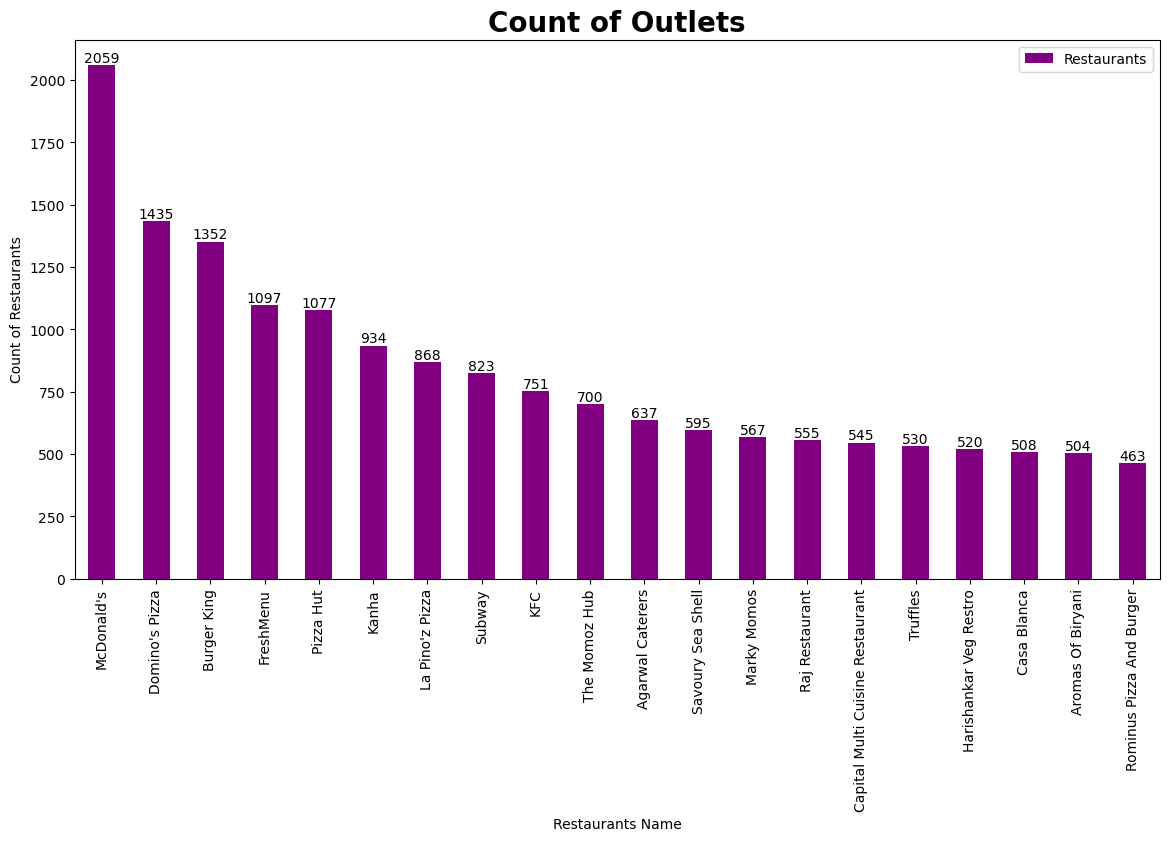

In [204]:
plt.figure(figsize = (14,7))
ax = df['Restaurant_Name'].value_counts().head(20).plot.bar(color='purple')
ax.bar_label(container=ax.containers[0])

ax.legend(['Restaurants'])
plt.xlabel("Restaurants Name")
plt.ylabel("Count of Restaurants")
plt.title("Count of Outlets",fontsize =20, weight = 'bold')
plt.show()

## Bestseller and other categories


In [207]:
df['Best_Seller'].value_counts().sort_values(ascending= False)

Best_Seller
NA                          95715
BESTSELLER                  16992
MUST TRY                     4151
Not eligible for coupons     2440
CHEF'S SPECIAL               1822
SPICY                        1254
Not on Pro                    657
NEW                           455
SEASONAL                       91
Eggless available              34
VEGAN                          26
GLUTEN FREE                     9
FODMAP FRIENDLY                 9
DAIRY FREE                      2
Name: count, dtype: int64

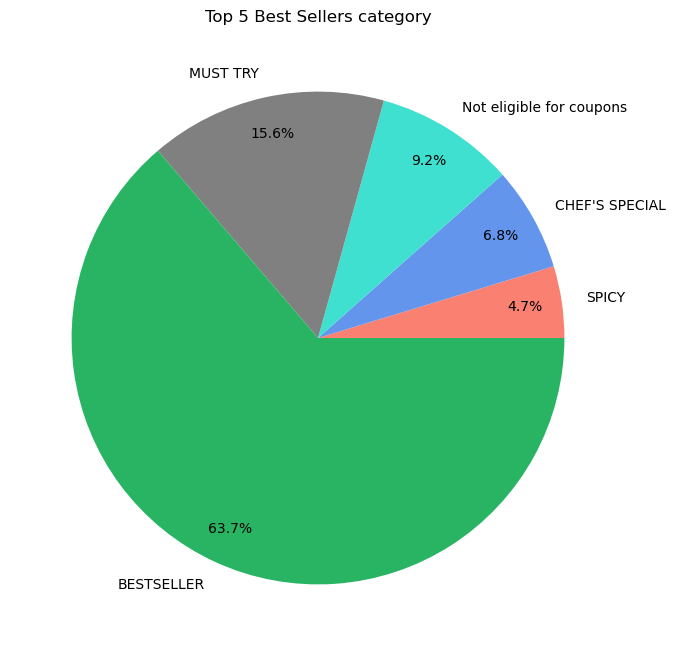

In [211]:
plt.figure(figsize = (13,8))

df_new = df[df["Best_Seller"] != 'NA']
df_bestseller = df_new['Best_Seller'].value_counts().nlargest(5).sort_values(ascending= True)
my_colors = ["#FA8072", "#6495ED", "#40E0D0", "#808080", "#28B463"]

plt.pie(df_bestseller, colors=my_colors,labels= df_bestseller.index,autopct='%1.1f%%', pctdistance=0.85)

plt.title('Top 5 Best Sellers category')
plt.show()

#### "Bestseller" category indicates the most popular and highly recommended items among customers. These are likely dishes or products that consistently receive positive reviews and high demand.

# CONCLUSION

#### City Distribution

#### Hyderabad, Jaipur, and Mumbai have the highest number of listed restaurants, reflecting strong demand.

#### Restaurant Popularity

#### Some restaurants, like Cafe Coffee Day and Domino’s, have a strong multi-city presence. The top 20 most frequent names dominate the landscape, showing strong brand consistency.

#### Ratings & Customer Experience

#### Dining and Delivery ratings often vary — some restaurants excel in one over the other. Combining them into a Total Rating helped identify the best-performing spots city-wise.

#### Customer Engagement

#### Cities like Bangalore and Mumbai show high vote counts, suggesting active user feedback and stronger community engagement.

#### Visual and Spatial Insights

#### Bar charts and a Folium map made it easy to identify hotspots of restaurant density and market presence across Indian cities